### Value: do fundamentally underpriced stocks outperform for given time horizons?

For decades, fundamental and quantitative hedge funds have applied `value` factors which indicate the relative pricing of a stock to it's fundamental value (for example `Price/Earnings`).

The idea is simple
```txt
For a given time horizon, fundamentally underpriced stocks should outperform, and fundamentally overpriced stocks should underperform
```

In [2]:
import yfinance as yf
from dotenv import load_dotenv
import os
from sqlalchemy import create_engine
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

load_dotenv()

db_url = os.getenv('DB_URL')
psql = create_engine(db_url)

In [50]:
fundamentals = pd.read_sql('select * from fundamentals_monthly', psql).drop_duplicates()

In [65]:
factors_and_styles = pd.read_sql('select * from factor_styles', psql)

In [67]:
value_factors = factors_and_styles[factors_and_styles['style'] == 'VALUE']['metric'].tolist()

In [55]:
wide_fundamentals = fundamentals.pivot(index=['date', 'ticker'], columns='metric', values='value').reset_index().drop(columns=[np.nan])

In [30]:
prices = pd.read_sql('select * from adjusted_monthly', psql)

In [58]:
prices_and_fundamentals = prices.merge(wide_fundamentals, how='left', on=['date', 'ticker'])

In [64]:
prices

,date,adj_close,volume,ticker
0,2000-06-30,44.2499,8280214.0,A
1,2000-07-31,24.4499,8053179.0,A
2,2000-08-31,36.5999,3479902.0,A
3,2000-09-30,29.3624,3677439.0,A
4,2000-10-31,27.7874,3913002.0,A
...,...,...,...,...
132042,2025-03-31,163.5494,3137000.0,ZTS
132043,2025-04-30,155.8788,2926200.0,ZTS
132044,2025-05-31,168.0680,5467800.0,ZTS
132045,2025-06-30,155.4303,2826600.0,ZTS


### Value factors

In [70]:
prices_and_fundamentals['adj_return'] = prices_and_fundamentals.groupby('ticker')['adj_close'].pct_change()
prices_and_fundamentals['adj_return_fwd'] = prices_and_fundamentals.groupby('ticker')['adj_return'].shift(-1)

/var/folders/qq/9n_h2x6x0pl9pvyr0gpk4m_r0000gn/T/ipykernel_85290/604090777.py:1: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  prices_and_fundamentals['adj_return'] = prices_and_fundamentals.groupby('ticker')['adj_close'].pct_change()


In [74]:
prices_and_fundamentals

,date,adj_close,volume,ticker,book_to_market,earnings_price,ebit_ev,ebitda_ev,ev,ev_ebit,ev_ebitda,leverage_proxy,marketcap,price_book,price_earnings,price_sales,sales_price,adj_return,adj_return_fwd
0,2000-06-30,44.2499,8280214.0,A,0.13889,0.01536,0.02421,0.03891,32475.1,41.3,25.7,-0.02638,33355.1,7.2,65.1,4.0,0.25000,NaN,-0.447459
1,2000-07-31,24.4499,8053179.0,A,0.25000,0.02778,0.04484,0.07194,17550.1,22.3,13.9,-0.04775,18430.1,4.0,36.0,2.2,0.45455,-0.447459,0.496935
2,2000-08-31,36.5999,3479902.0,A,0.16949,0.01855,0.02950,0.04717,26708.6,33.9,21.2,-0.03190,27588.6,5.9,53.9,3.3,0.30303,0.496935,-0.197746
3,2000-09-30,29.3624,3677439.0,A,0.22222,0.02695,0.04255,0.06369,21596.5,23.5,15.7,-0.02589,22170.5,4.5,37.1,2.3,0.43478,-0.197746,-0.053640
4,2000-10-31,27.7874,3913002.0,A,0.23256,0.02849,0.04505,0.06757,20405.1,22.2,14.8,-0.02736,20979.1,4.3,35.1,2.1,0.47619,-0.053640,0.126856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132042,2025-03-31,163.5494,3137000.0,ZTS,0.06452,0.03367,0.04274,0.04902,78485.9,23.4,20.4,0.06452,73728.9,15.5,29.7,8.0,0.12500,-0.015487,-0.046901
132043,2025-04-30,155.8788,2926200.0,ZTS,0.06803,0.03546,0.04484,0.05128,74791.7,22.3,19.5,0.06792,70034.7,14.7,28.2,7.6,0.13158,-0.046901,0.078197
132044,2025-05-31,168.0680,5467800.0,ZTS,0.06211,0.03356,0.04255,0.04854,80104.4,23.5,20.6,0.06699,75075.4,16.1,29.8,8.1,0.12346,0.078197,-0.075194
132045,2025-06-30,155.4303,2826600.0,ZTS,0.06711,0.03623,0.04566,0.05236,74459.2,21.9,19.1,0.07243,69430.2,14.9,27.6,7.5,0.13333,-0.075194,-0.043944


In [71]:
value_results = []


for date, data in prices_and_fundamentals.groupby('date'):
    for v in value_factors:
        v_ic = data[v].corr(data['adj_return_fwd'], method='spearman')
        value_results.append({
            'date': date,
            'metric': v,
            'ic': v_ic
        })

In [83]:
normal_factors = [
    'price_book',
    'price_earnings',
    'price_sales',
    'sales_price',
    'ev_ebit',
    'ev_ebitda'
]

In [81]:
value_df = pd.DataFrame(value_results).dropna()
value_df = value_df.sort_values(['metric', 'date'])
value_df['ic_12m_avg'] = (
    value_df.groupby('metric')['ic']
      .transform(lambda s: s.rolling(12, min_periods=1).mean())
)

In [84]:
value_df = value_df[value_df['metric'].isin(normal_factors)]

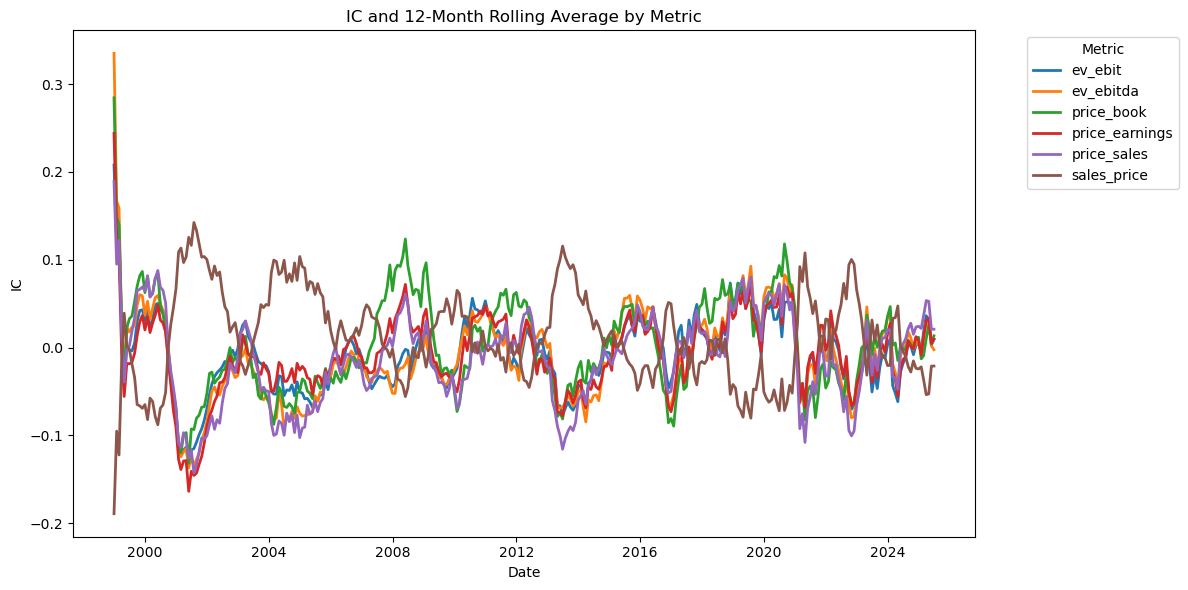

In [85]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=value_df, x='date', y='ic_12m_avg', hue='metric', linewidth=2)

plt.title("IC and 12-Month Rolling Average by Metric")
plt.xlabel("Date")
plt.ylabel("IC")
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()